In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [3]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [4]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
        if((diff_sec>3.0) and (curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

In [5]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
    diff_std_ = std_i**2

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [6]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

## Import Data in Certain Time Period

In [7]:
subject_name = 'pond'

if(subject_name=='ped'):
    rec_date = '2019-01-04'
    start_time = '11:37:01'
    end_time = '11:42:13'

if(subject_name=='pond'):
    rec_date = '2016-01-01'
    start_time = '07:42:14'
    end_time = '07:47:01'

if(subject_name=='indy'):
    rec_date = '2018-12-19'
    start_time = '16:17:05'
    end_time = '16:21:55'

In [27]:
basepath = ''
datapath = 'SmartwatchData/raw_data/'
timepath = 'timestamps/'

filepath = datapath + 'log_acc_' + subject_name + '.csv'
df = pd.read_csv(filepath)
filtered = [i for i in df['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_filt = df[df['timestamp'].isin(filtered)]
df_filt = df_filt.reset_index(drop=True)

cols = ['timestamp','x','y','z']
df_filt = df_filt[cols]

df_filt

,timestamp,x,y,z
0,2016-01-01 07:42:14.087,-3.794810,-2.211045,8.607155
1,2016-01-01 07:42:14.233,-4.551377,-1.914164,8.420407
2,2016-01-01 07:42:14.416,-4.991911,-2.081758,7.759608
3,2016-01-01 07:42:14.556,-6.399701,-1.885434,8.037335
4,2016-01-01 07:42:14.716,-7.271191,-1.282095,6.754043
5,2016-01-01 07:42:14.875,-7.841011,-1.315614,6.351817
6,2016-01-01 07:42:15.046,-7.979874,-1.368286,5.197812
7,2016-01-01 07:42:15.196,-8.458715,-1.593341,4.814740
8,2016-01-01 07:42:15.357,-8.865729,-1.612495,4.484340
9,2016-01-01 07:42:15.517,-9.229648,-2.589329,3.766079


In [28]:
filepath = datapath + 'log_hr_'+ subject_name + '.csv'
df2 = pd.read_csv(filepath)

filtered = [i for i in df2['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_hr = df2[df2['timestamp'].isin(filtered)]
df_hr = df_hr.reset_index(drop=True)

cols = ['timestamp','hr']
df_hr = df_hr[cols]

df_hr

,timestamp,hr
0,2016-01-01 07:42:15.211,0.000000
1,2016-01-01 07:42:16.311,0.000000
2,2016-01-01 07:42:17.4,0.000000
3,2016-01-01 07:42:18.51,0.000000
4,2016-01-01 07:42:19.65,0.000000
5,2016-01-01 07:42:20.732,0.000000
6,2016-01-01 07:42:21.842,0.000000
7,2016-01-01 07:42:22.924,0.000000
8,2016-01-01 07:42:24.057,0.000000
9,2016-01-01 07:42:25.115,0.000000


In [29]:
hr_cnt = 0

for i in range(len(df_filt)):
    hr_time = df_hr.loc[hr_cnt,'timestamp'].split(' ')[1]
    filt_time = df_filt.loc[i,'timestamp'].split(' ')[1]
    
    if(calc_sec(hr_time)<=calc_sec(filt_time)):
        if(hr_cnt<len(df_hr)-1):
            hr_cnt += 1
    df_filt.loc[i,'HR'] = df_hr.loc[hr_cnt,'hr']

In [30]:
df_filt

,timestamp,x,y,z,HR
0,2016-01-01 07:42:14.087,-3.794810,-2.211045,8.607155,0.000000
1,2016-01-01 07:42:14.233,-4.551377,-1.914164,8.420407,0.000000
2,2016-01-01 07:42:14.416,-4.991911,-2.081758,7.759608,0.000000
3,2016-01-01 07:42:14.556,-6.399701,-1.885434,8.037335,0.000000
4,2016-01-01 07:42:14.716,-7.271191,-1.282095,6.754043,0.000000
5,2016-01-01 07:42:14.875,-7.841011,-1.315614,6.351817,0.000000
6,2016-01-01 07:42:15.046,-7.979874,-1.368286,5.197812,0.000000
7,2016-01-01 07:42:15.196,-8.458715,-1.593341,4.814740,0.000000
8,2016-01-01 07:42:15.357,-8.865729,-1.612495,4.484340,0.000000
9,2016-01-01 07:42:15.517,-9.229648,-2.589329,3.766079,0.000000


In [31]:
cols = df_filt.columns.tolist()

row_len = len(df_filt.index)

dates = [df_filt.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(df_filt.iloc[i,0].split(' ')[1]) for i in range(row_len)]

period = calc_t_period(dates,secs)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    
ts = np.array(ts)
print(ts)

[['2016-01-01' '7:42:14.087' '7:47:0.729']]


In [32]:
ts1 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[0][2])]
df1 = df_filt[df_filt['timestamp'].isin(ts1)]

g = 9.8
df1.loc[:,'x'] = df1['x'].apply(lambda x: x/g)
df1.loc[:,'y'] = df1['y'].apply(lambda x: x/g)
df1.loc[:,'z'] = df1['z'].apply(lambda x: x/g)

## Calculate Activity Index

In [33]:
H = 10
ai1 = []

for i in range(len(df1)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H,0,-1):
            xyz_val.append([df1.iloc[i-j,1],df1.iloc[i-j,2],df1.iloc[i-j,3]])
        ai_val = float(equation_bai(xyz_val))
        ai1.append(ai_val)
    else:
        ai1.append(1)

In [34]:
df1['AI'] = pd.Series(ai1)

df1

,timestamp,x,y,z,HR,AI
0,2016-01-01 07:42:14.087,-0.387225,-0.225617,0.878281,0.000000,1.000000
1,2016-01-01 07:42:14.233,-0.464426,-0.195323,0.859225,0.000000,1.000000
2,2016-01-01 07:42:14.416,-0.509379,-0.212424,0.791797,0.000000,1.000000
3,2016-01-01 07:42:14.556,-0.653031,-0.192391,0.820136,0.000000,1.000000
4,2016-01-01 07:42:14.716,-0.741958,-0.130826,0.689188,0.000000,1.000000
5,2016-01-01 07:42:14.875,-0.800103,-0.134246,0.648145,0.000000,1.000000
6,2016-01-01 07:42:15.046,-0.814273,-0.139621,0.530389,0.000000,1.000000
7,2016-01-01 07:42:15.196,-0.863134,-0.162586,0.491300,0.000000,1.000000
8,2016-01-01 07:42:15.357,-0.904666,-0.164540,0.457586,0.000000,1.000000
9,2016-01-01 07:42:15.517,-0.941801,-0.264217,0.384294,0.000000,1.000000


## Colors for Each Acitivity

In [35]:
ts_ = []
labels = []

with open(timepath + 'times_' + subject_name + '.txt','r') as f:
    for line in f:
        t = line.strip('\n').split('\t')
        ts_.append(float(t[0]))
        labels.append(t[1])

accum = 0
ts = []
for x in ts_:
    accum += x
    ts.append(round(accum,2))

lb_set = set()
for x in labels:
    lb_set.add(x)

lb_ = list(lb_set)

set_cnt = []
for i in range(len(lb_)):
    set_cnt.append(0)

lb = []
lb.append('NaN')

for x in labels:
    for i in range(len(lb_)):
        if(lb_[i]==x and set_cnt[i]!=1 and lb_[i]!='NaN'):
            set_cnt[i] = 1
            lb.append(x)

colors = ['#808080', '#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231',
          '#911EB4', '#46F0F0', '#F032E6', '#BCF60C', '#008080', '#E6BEFF', 
          '#9A6324', '#800000', '#AAFFC3', '#808000', '#000075']

color_dict = {}
for i in range(len(lb)):
    color_dict[lb[i]] = colors[i]
    
print(color_dict)

lb_color = []
for x in labels:
    lb_color.append(color_dict[x])

print(lb_color)
print(len(lb_color))
print(ts)

{'NaN': '#808080', 'stand': '#E6194B', 'sit': '#3CB44B', 'lay down': '#FFE119', 'walk': '#4363D8'}
['#E6194B', '#3CB44B', '#E6194B', '#FFE119', '#3CB44B', '#FFE119', '#E6194B', '#808080', '#4363D8', '#808080']
10
[30.8, 61.6, 92.63, 125.57, 156.53, 187.58, 218.61, 230.24, 275.99, 287.46]


## Plot Acc, AI with Colors

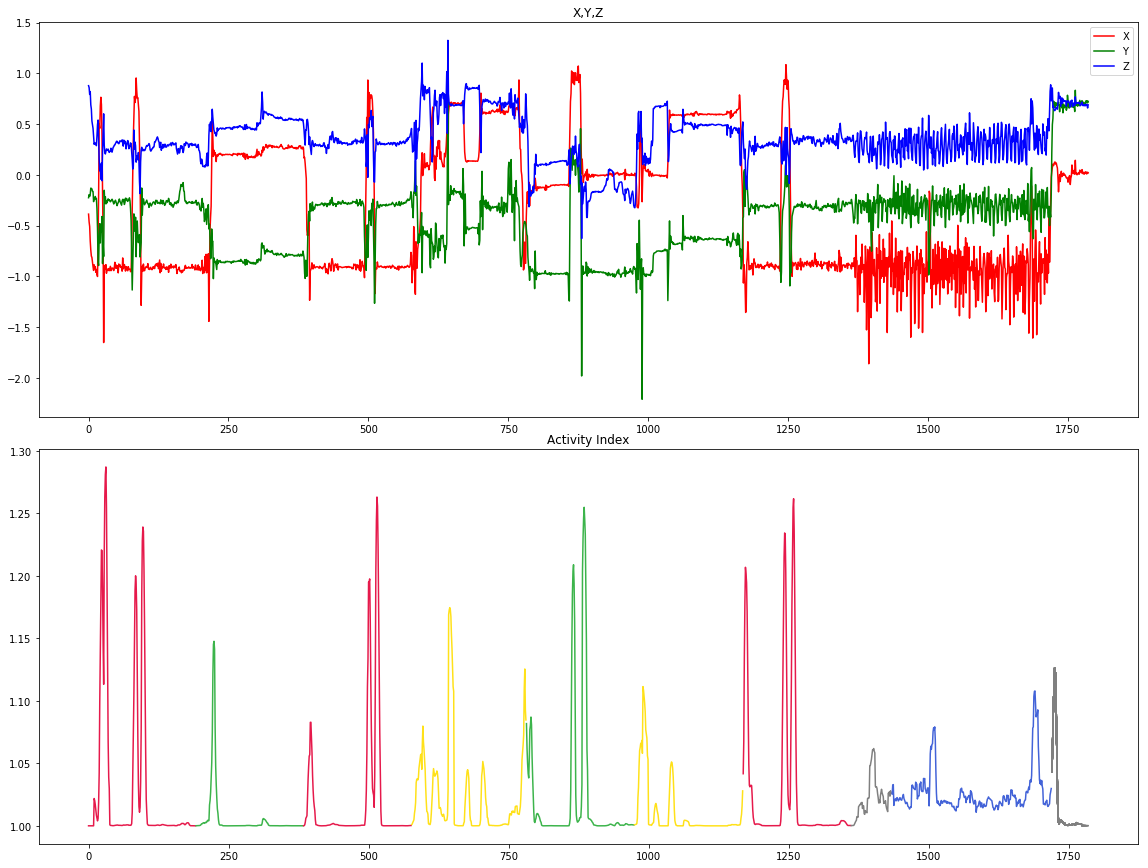

<Figure size 1080x1440 with 0 Axes>

In [36]:
dict1 = df1.to_dict(orient='list')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
fig.tight_layout()

ts_cnt = 0
x_axis = []
y_ai = []

ax = axes[0]
ax.plot(dict1['x'],color='r',label='X')
ax.plot(dict1['y'],color='g',label='Y')
ax.plot(dict1['z'],color='b',label='Z')
ax.legend(loc='upper right')
ax.set_title('X,Y,Z')

ax = axes[1]
for i in range(len(dict1['timestamp'])):
    if(dict1['AI'][i]>0):
        if(calc_sec(dict1['timestamp'][i].split(' ')[1])>calc_sec(start_time)+ts[ts_cnt]):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            ts_cnt += 1
            x_axis = []
            y_ai = []
            
        elif(ts_cnt==len(lb_color)-1):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            
        x_axis.append(i)
        y_ai.append(dict1['AI'][i])

ax.set_title('Activity Index')

# ax = axes[2]
# ax.plot(dict1['HR'],label='HR')
# ax.set_ylim(bottom=30,top=110)
# ax.legend(loc='upper right')
# ax.set_title('Heart Rate')


plt.figure(figsize=(15,20))
fig.savefig(basepath + 'Graphs/testrun_' + subject_name + '.png', dpi = 300)

plt.show()

## Calculate Roll, Pitch, Yaw Angles

In [37]:
import math

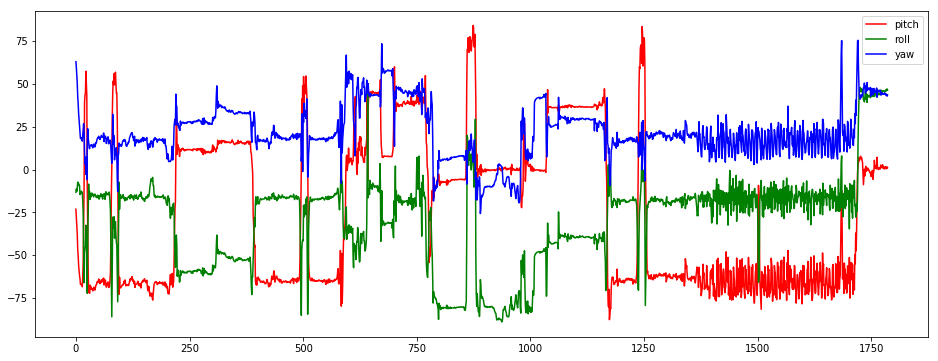

In [38]:
ax = np.array(dict1['x'])
ay = np.array(dict1['y'])
az = np.array(dict1['z'])

pitch = 180 * np.arctan(ax/np.sqrt(ay*ay + az*az))/math.pi
roll = 180 * np.arctan(ay/np.sqrt(ax*ax + az*az))/math.pi
yaw = 180 * np.arctan(az/np.sqrt(ax*ax + ay*ay))/math.pi

plt.figure(figsize=(16,6))
plt.plot(pitch,color='r',label='pitch')
plt.plot(roll,color='g',label='roll')
plt.plot(yaw,color='b',label='yaw')
plt.legend()

plt.show()

## Classify Walking Periods

In [39]:
def fluc(axis,rs,rf,diff=0.15):
    cnt = 0
    mult = 0
    j = 1

    i = rs
    while(i<rf):
        if(abs(df1[axis][i+j]-df1[axis][i])>diff):
            if(cnt==0):
                if(df1[axis][i+j]>df1[axis][i]):
                    mult = 1
                else:
                    mult = -1
                cnt += 1
            else:
                if((df1[axis][i+j]>df1[axis][i] and mult==-1) or 
                   (df1[axis][i+j]<df1[axis][i] and mult==1)):
                    mult *= -1
                    cnt += 1
            i += j-1  
        else:
            if(cnt==0):
                if(df1[axis][i+j]>df1[axis][i]):
                    mult = 1
                else:
                    mult = -1
        i += 1

    return cnt

In [40]:
step = 10
s = 0
f = len(df1)

thres = 2

walk = [set()]
arr = [[]]
ax = ['x']
axes = 1

for i in range(s,f,step):
    for j in range(axes):
        if(i+step<f):
            arr[j].append(fluc(ax[j],i,i+step,diff=0.15))
        else:
            arr[j].append(fluc(ax[j],i,f-1,diff=0.15))
        if(len(arr[j])>=6 and 
           arr[j][-6]>=thres and arr[j][-5]>=thres and 
           arr[j][-4]>=thres and arr[j][-3]>=thres and 
           arr[j][-2]>=thres and arr[j][-1]>=thres):
            for k in range(6):
                walk[j].add(i-k*step)
        
for i in range(axes):
    walk[i] = list(walk[i])
    walk[i] = sorted(walk[i])

In [41]:
walk_its = walk[0]

print(walk_its)

[1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710]


In [42]:
class period:
    def __init__(self,s,f):
        self.s = s
        self.f = f

In [43]:
walk_its_p = []
kp = walk_its[0]

for i in range(len(walk_its)):
    if(i+1<=len(walk_its)-1 and walk_its[i+1]-walk_its[i]>step):
        walk_its_p.append(period(kp,walk_its[i]))
        kp = walk_its[i+1]

    if(i==len(walk_its)-1 and walk_its[i]-walk_its[i-1]==step):
        walk_its_p.append(period(kp,walk_its[i]))

for x in walk_its_p:
    print(x.s,x.f)

1370 1710


## Classifying Inactive Periods

In [44]:
print(np.std(ai1[550:625]))

0.022505917107006407


In [45]:
ki = -1
kj = -1
s = []
sd_thres = 0.002

for i in tqdm(range(0,len(ai1)-1)):
    if(not(len(s)!=0 and s[-1].s==ki and s[-1].f==kj)):
        s.append(period(ki,kj))
    for j in range(1,len(ai1)):
        if(j-i>=50):
            if(np.std(ai1[i:j])<sd_thres):
                kj = j
                ki = i

100%|██████████| 1786/1786 [00:51<00:00, 34.41it/s] 


In [46]:
seq = []
for i in range(len(ai1)):
    seq.append(i)
    
sequence = []
for x in s:
    if(x.s in seq and x.f in seq):
        for i in range(x.s,x.f+1):
            seq.remove(i)
        sequence.append(x)

for x in sequence:
    print(x.s,x.f)

104 217
230 391
404 496
522 582
803 860
892 981
1046 1167
1187 1237
1265 1374
1731 1786


## Plot the Classified Activity Index

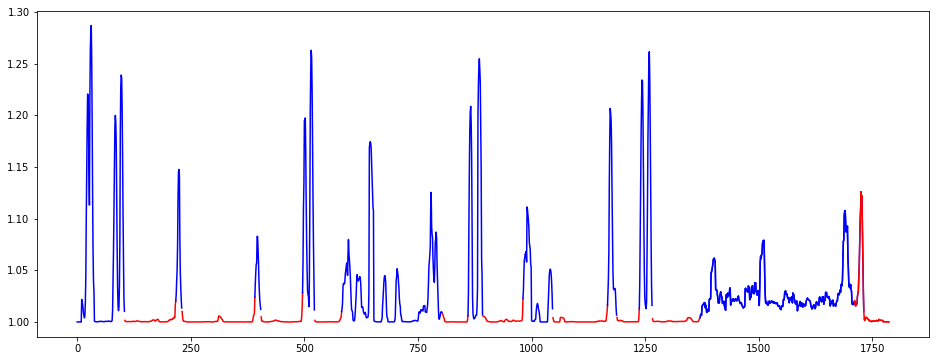

In [47]:
x_axis = []
y_axis = []
active = set()
seq_idx = 0
idx = 1 + np.std(ai1)

fig = plt.figure(figsize=(16,6))

for i in range(len(ai1)):
    if(seq_idx<len(sequence) and i>=sequence[seq_idx].s and i<=sequence[seq_idx].f):
#         print('r',i)
        x_axis.append(i)
        y_axis.append(ai1[i])
        active.add(ai1[i])
    
    if(seq_idx<len(sequence) and i==sequence[seq_idx].f):
        plt.plot(x_axis,y_axis,color='r')
        x_axis = []
        y_axis = []
        seq_idx += 1
        
    if(seq_idx<len(sequence) and i<=sequence[seq_idx].s):
#         print('b++',i)
        x_axis.append(i)
        y_axis.append(ai1[i])
    
    if(seq_idx<len(sequence) and i==sequence[seq_idx].s):
        plt.plot(x_axis,y_axis,color='b')
        x_axis = []
        y_axis = []
    
    
x_axis = []
y_axis = []

p_idx = 0
for i in range(len(df1)):
    if(p_idx<len(walk_its_p)):
        if(i>=walk_its_p[p_idx].s and i<=walk_its_p[p_idx].f):
    #         print('r',i)
            x_axis.append(i)
            y_axis.append(ai1[i])

        if(i==walk_its_p[p_idx].f):
            plt.plot(x_axis,y_axis,color='b')
            x_axis = []
            y_axis = []
            p_idx += 1

    if(p_idx<len(walk_its_p)):
        if(i<=walk_its_p[p_idx].s):
    #         print('b++',i)
            x_axis.append(i)
            y_axis.append(ai1[i])

        if(i==walk_its_p[p_idx].s):
            x_axis = []
            y_axis = []
            
    else:
        x_axis.append(i)
        y_axis.append(ai1[i])
        if(i==len(df1)-1):
            plt.plot(x_axis,y_axis,color='r')

fig.savefig(basepath + 'Graphs/' + subject_name + '.png', dpi=300)          
plt.show()

1


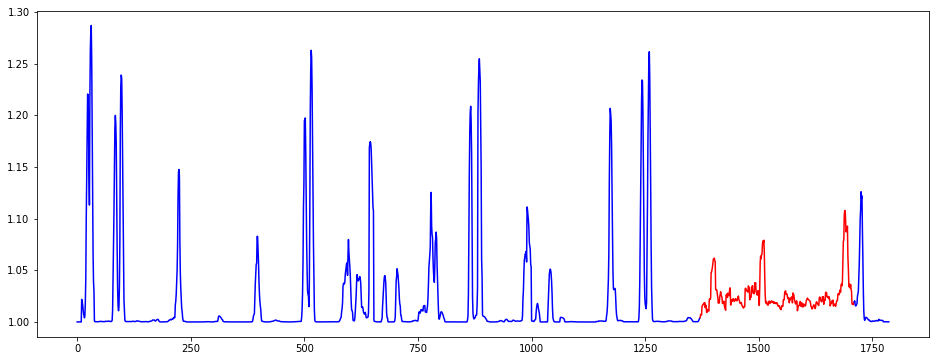

In [48]:
x_axis = []
y_axis = []

p_idx = 0

fig = plt.figure(figsize=(16,6))

print(len(walk_its_p))
for i in range(len(df1)):
    if(p_idx<len(walk_its_p)):
        if(i>=walk_its_p[p_idx].s and i<=walk_its_p[p_idx].f):
    #         print('r',i)
            x_axis.append(i)
            y_axis.append(ai1[i])

        if(i==walk_its_p[p_idx].f):
            plt.plot(x_axis,y_axis,color='r')
            x_axis = []
            y_axis = []
            p_idx += 1

    if(p_idx<len(walk_its_p)):
        if(i<=walk_its_p[p_idx].s):
    #         print('b++',i)
            x_axis.append(i)
            y_axis.append(ai1[i])

        if(i==walk_its_p[p_idx].s):
            plt.plot(x_axis,y_axis,color='b')
            x_axis = []
            y_axis = []
            
    else:
        x_axis.append(i)
        y_axis.append(ai1[i])
        if(i==len(df1)-1):
            plt.plot(x_axis,y_axis,color='b')
    
fig.savefig(subject_name + '_walking.png')
plt.show()

## Fourier Transform

In [49]:
a1 = np.array(ai1)
N = a1.shape[0]

T = 0.16
x_ = np.linspace(1/(T*(N-1)), 1/(2*T), (N+1)//2-1)
# x = np.linspace(1/(T*(N-1)), 1/T, N-1)

ft = np.fft.rfft(a1)

# print(ft)
print(ft.shape)
print(x_.shape)

(894,)
(893,)


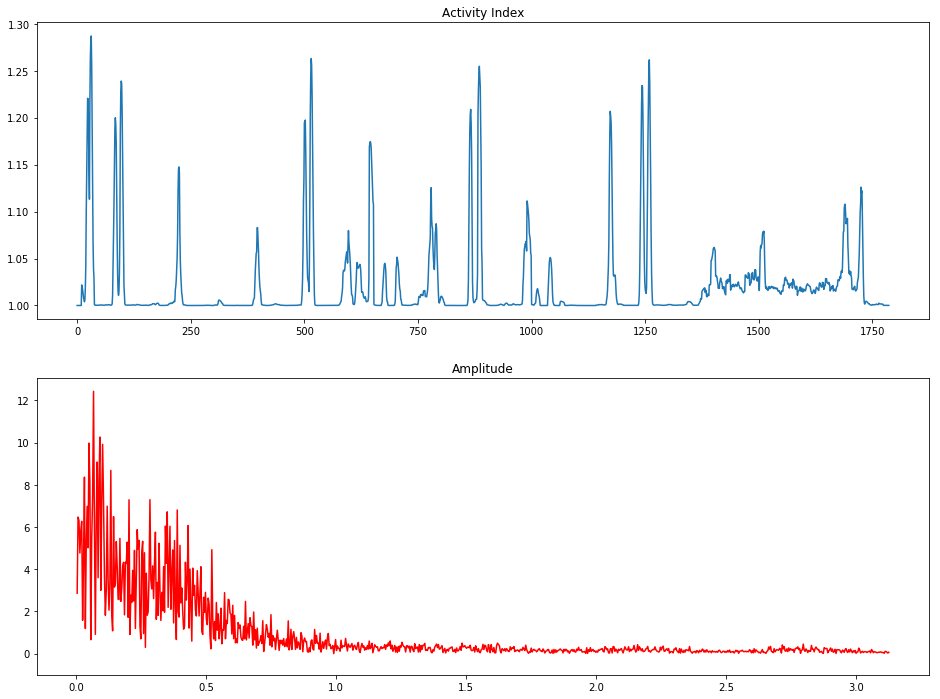

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))

ax = axes[0]
ax.plot(a1)
ax.set_title('Activity Index')

ax = axes[1]
ax.plot(x_,np.abs(ft)[1:],color='r')
ax.set_ylim(bottom=-1)
ax.set_title('Amplitude')

# ax = axes[2]
# ax.plot(x,ft.imag[1:],'b')
# ax.set_title('Imaginary Part')

plt.show()
# fig.savefig('testrun_ped_fft.png',dpi=300)

85


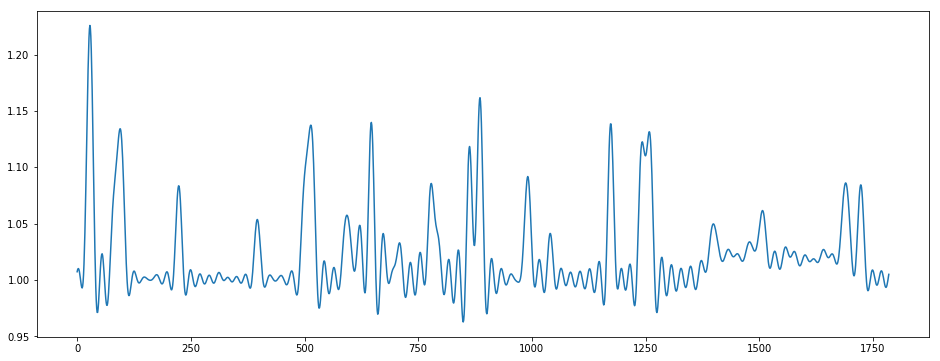

In [51]:
f = 0.3
r = int(N*T*f)

mask = np.zeros((N+1)//2)
mask[0:r+1] = 1
# mask[r:] = 1
print(r)

y_masked = np.fft.irfft(ft*mask)

plt.figure(figsize=(16,6))
plt.plot(np.abs(y_masked))
plt.show()

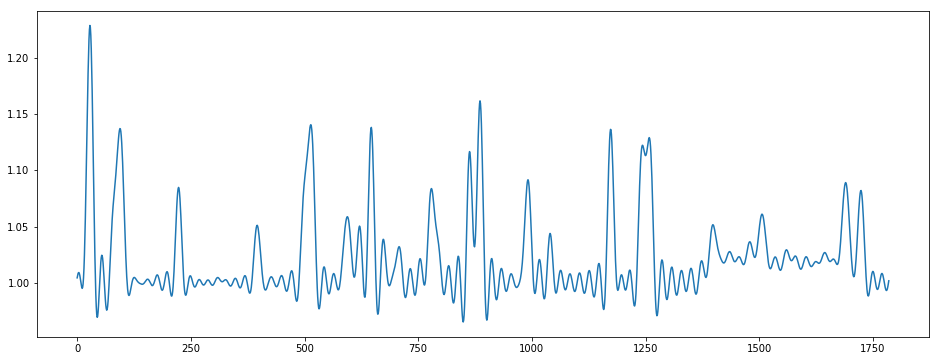

In [52]:
f1 = 0.3
f2 = 2.5

lo_mask = np.where(x_>f1)
med_mask = np.where((x_-f1)*(x_-f2)>=0)
hi_mask = np.where(x_<f2)

pos_mask = lo_mask

med_freq_fft = ft.copy()
med_freq_fft[pos_mask] = 0
filtered_sig = np.fft.irfft(med_freq_fft)

plt.figure(figsize=(16,6))
plt.plot(np.abs(filtered_sig))
plt.show()

# plt.savefig('mask_lowpass.png',dpi=300)